# Changing Properties of Discrete Feature Elements

A simple example to change properties of Discrete Features Elements in FEFLOW.

The example model is a box, with constant hydraulic head boundary conditions at the top (northern) and bottom (southern) border, causing an upwards flow.

Along its center is a 1D Discrete feature, which will be activated and deactivated during the transient simulation by setting its cross-sectional area property to 0 m² (inactive) or 1 m² (active).

Note that it is not possible to create Discrete Feature Elements while the Simulator is active.

*Note: This example uses ifm_contrib for non-essential features like plotting to keep the code concise. See [(dhi.github.com/ifm_contrib](dhi.github.com/ifm_contrib)* for more information.

In [1]:
import ifm_contrib as ifm
import matplotlib.pyplot as plt

# load the example model and start the simulation till day 20.
doc = ifm.loadDocument("./discrete-features/femdata/box_dfe.fem")
doc.runTo(20.)

True

Initially, the cross-section of the DFEs is set to zero. The DFE is thus inactive and does not influence the darcy-velocity.

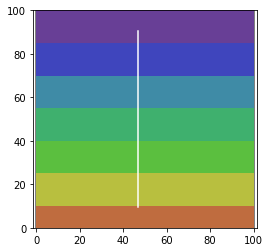

In [2]:
def plot_model():

    # plot head isocontours
    fig, ax1 = plt.subplots(figsize=(4, 4))
    doc.c.plot.faces()
    doc.c.plot.fringes(par=ifm.Enum.P_HEAD)
    ax1.axis("equal")

    # plot DFE location
    y_max = doc.c.dfe.df.dfe().y1.max()
    y_min = doc.c.dfe.df.dfe().y2.min()
    x = doc.c.dfe.df.dfe().x1.mean()
    plt.plot([x,x], [y_min, y_max], color="white")
    
    plt.show()

plot_model()

The following code iterates through the DFE in the model and sets the cross-section area to the specified value:

In [3]:
def set_area(area):
    for dfe in range(doc.getNumberOf1DFractureElements()):
        doc.setFracArea(dfe, 
                        area, 
                        ifm.Enum.ALL_FRAC_TYPES, 
                        ifm.Enum.ALL_FRAC_MODES, 
                        ifm.Enum.ALL_FRAC_LAWS )

set_area(1.)

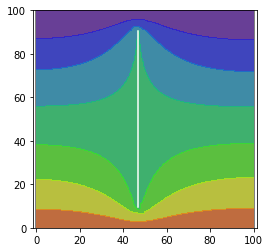

In [4]:
# continue the run to day 40 and show result again
doc.runTo(40.)
plot_model()

The DFE is now active and creates a preferential flow path.
This can be reversed by setting the cross-sectional area back to zero.

The model run is continued for another 20 days.

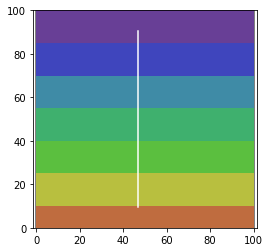

In [5]:
# deactivate the DFEs and continue the run to day 60 and show result again
set_area(0.)
doc.runTo(60.)
plot_model()

The transient behaviour of the DFE can be seen by the variation of the total flow rate that passes through the model (1 m³/d without DFE, ~1.75 m³/d with DFE:

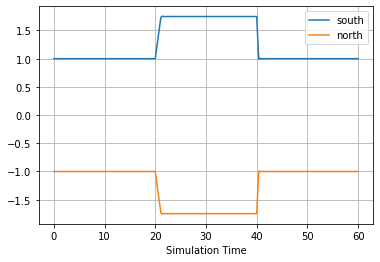

In [6]:
# fluxes with DFE active : 1.747389 m³/d
doc.c.hist.df.FFLUX.plot()
plt.grid()